# Logistic Regression Project (Predict Ad click)

En este notebook vamos a aplicar la `Regresión logística` para indicar si un usuario de internet va a clickar en uno de nuestros anuncios. Vamos a intentar crear un modelo que consiga predecir esto en base a las caracteristicas del usuario.

Hablemos de las columnas/features que tenemos disponibles:

* '`Daily Time Spent on Site`': tiempo consumido en la web en minutos
* '`Age`': la edad del usuario en años
* '`Area Income`': el ingreso medio del área geográfica del usuario
* '`Daily Internet Usage`': Minutos de media que el usuario usa/consume intenet
* '`Ad Topic Line`': Headline del anuncio (investiga que puede ser esto!)
* '`City`': Ciudad del usuario
* '`Male`': Indicador si el usuario es o no un hombre
* '`Country`': País del usuario
* '`Timestamp`': Hora a la que el usuario ha clickado en la publicidad o ha cerrado la ventana. 
* '`Clicked on Ad`': Indicador si finalmente ha clickado o no en la publicidad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Descarga y carga los datos

In [2]:
df = pd.read_csv('data/advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis (Descriptores + visualizaciones exploratorias)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Cloned 5thgeneration orchestration,Lisamouth,NaN,France,2016-03-27 00:53:11,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


In [9]:
df.Country.nunique()

237

In [5]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [6]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

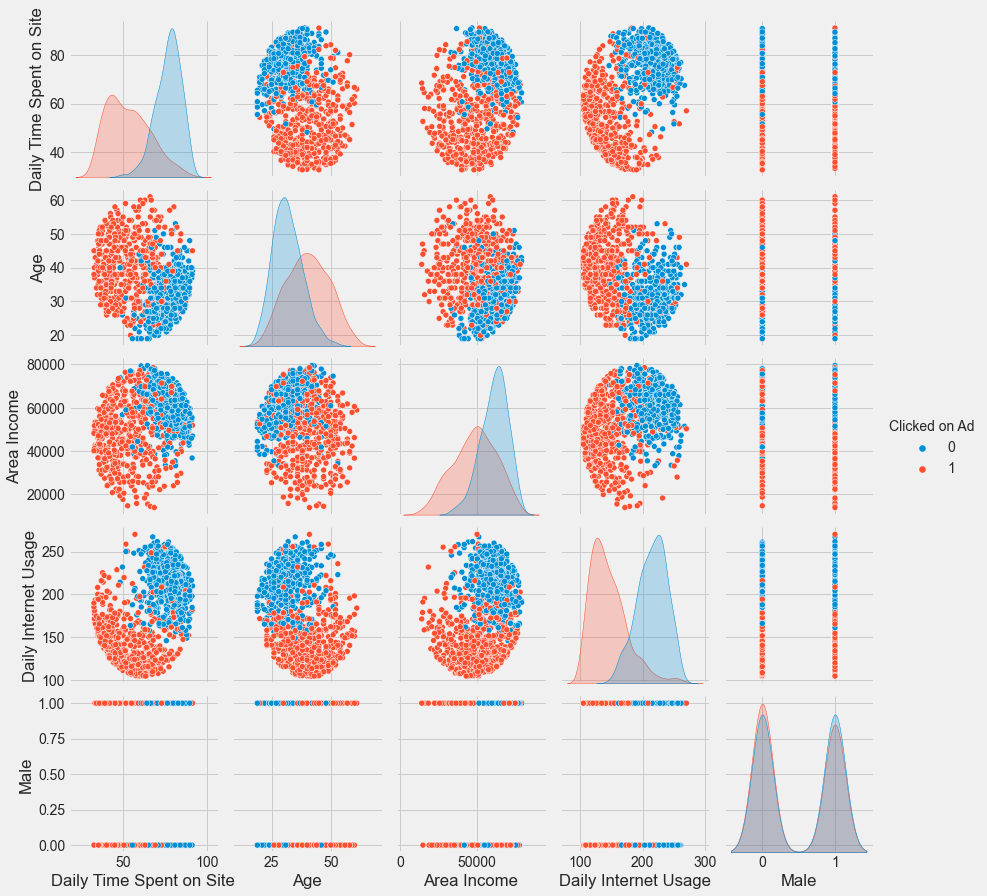

In [10]:
sns.pairplot(df, hue='Clicked on Ad')

<AxesSubplot:>

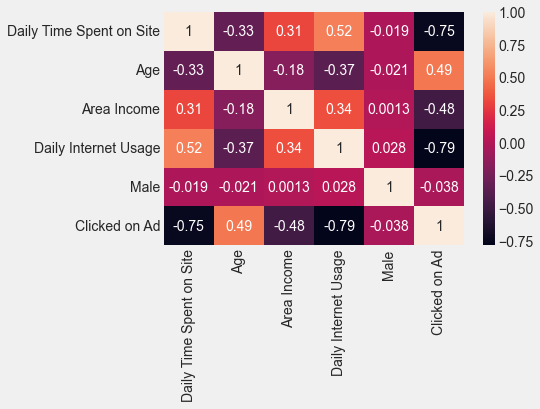

In [11]:
sns.heatmap(df.corr(), annot=True)

# 2. Prepara tus datos para la Logistic Regression



#### 1. Feature engineering


In [12]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [14]:
df['Ad Topic Line'].str.split(' ').values

array([list(['Cloned', '5thgeneration', 'orchestration']),
       list(['Monitored', 'national', 'standardization']),
       list(['Organic', 'bottom-line', 'service-desk']),
       list(['Triple-buffered', 'reciprocal', 'time-frame']),
       list(['Robust', 'logistical', 'utilization']),
       list(['Sharable', 'client-driven', 'software']),
       list(['Enhanced', 'dedicated', 'support']),
       list(['Reactive', 'local', 'challenge']),
       list(['Configurable', 'coherent', 'function']),
       list(['Mandatory', 'homogeneous', 'architecture']),
       list(['Centralized', 'neutral', 'neural-net']),
       list(['Team-oriented', 'grid-enabled', 'Local', 'Area', 'Network']),
       list(['Centralized', 'content-based', 'focus', 'group']),
       list(['Synergistic', 'fresh-thinking', 'array']),
       list(['Grass-roots', 'coherent', 'extranet']),
       list(['Persistent', 'demand-driven', 'interface']),
       list(['Customizable', 'multi-tasking', 'website']),
       list(['

In [17]:
df['palabras_clave'] = np.where(df['Ad Topic Line'].str.contains('Robust'), 1, 0)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,palabras_clave
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Madrid, Barcelona, Valencia
# 0, 1, 2
# 4000000, 3500000, 1000000 
# Tasa de penetracion smartphones

le.fit(df['City'])
df['City_encoded'] = le.transform(df['City'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,palabras_clave,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,1,805
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935


In [21]:
from category_encoders import BinaryEncoder

# Creamos el codificador indicandole la columna
encoder = BinaryEncoder(cols=['Country'])

In [22]:
# Ajustamos el codificador con country y la transformamos
encoder.fit(df['Country'])
df_binario = encoder.transform(df['Country'])
df = pd.concat([df, df_binario], axis=1)
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,palabras_clave,City_encoded,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126,0,1,0,1,0,1,1,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488,0,0,0,0,1,1,1,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,0,798,0,1,1,1,0,1,1,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935,0,0,1,1,1,1,0,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1,0,744,0,1,1,1,0,1,1,1


In [25]:
df['Country'].nunique()

237

In [28]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour
df['weekday'] = df['Timestamp'].dt.weekday
df['day'] = df['Timestamp'].dt.day

In [11]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'month', 'hour', 'weekday', 'day'],
      dtype='object')

<AxesSubplot:>

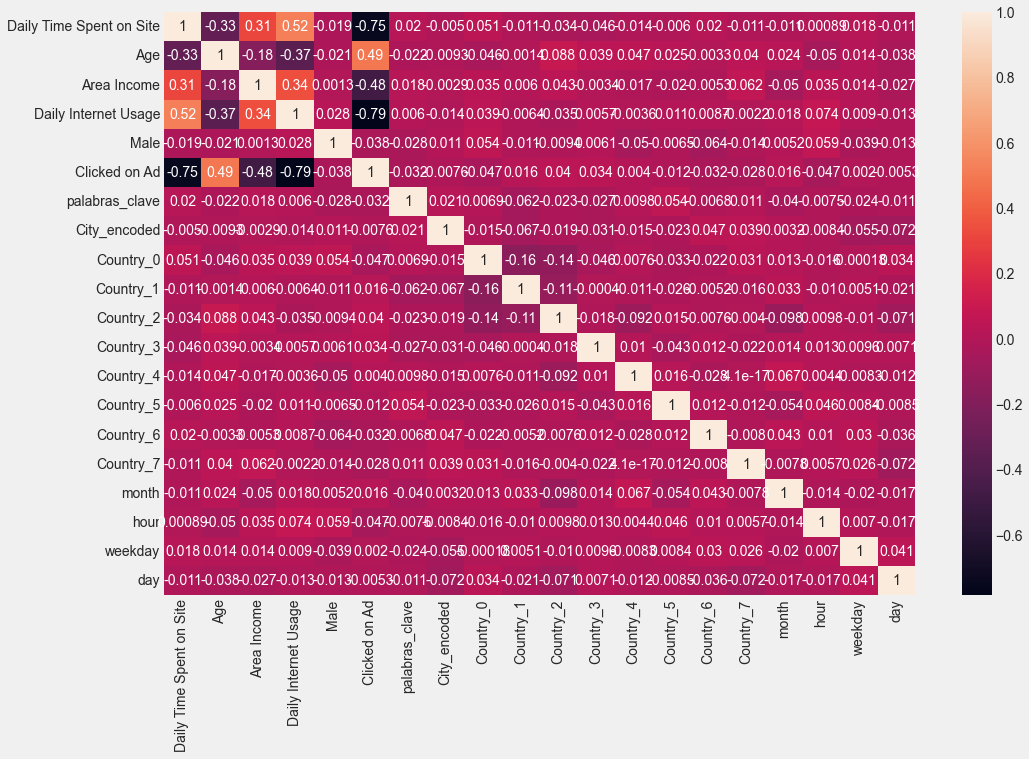

In [34]:
plt.figure(figsize=(15,10))


sns.heatmap(df.corr(), annot=True)


#### 2. Separación Train-test 


In [15]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df['Clicked on Ad']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)



#### 3. StandardScaler()


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [19]:
scaler.inverse_transform(X_train_scal)

array([[7.327000e+01, 2.800000e+01, 6.730139e+04, 2.162400e+02],
       [5.156000e+01, 4.600000e+01, 6.310219e+04, 1.248500e+02],
       [5.630000e+01, 4.900000e+01, 6.743096e+04, 1.352400e+02],
       ...,
       [7.394000e+01, 2.600000e+01, 5.541106e+04, 2.361500e+02],
       [7.864000e+01, 3.100000e+01, 6.028347e+04, 2.352800e+02],
       [4.206000e+01, 3.400000e+01, 4.324119e+04, 1.315500e+02]])

In [20]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
687,73.27,28,67301.39,216.24
500,51.56,46,63102.19,124.85
332,56.30,49,67430.96,135.24
979,70.29,31,56974.51,254.65
817,54.47,23,46780.09,141.52
...,...,...,...,...
835,63.11,34,63107.88,254.94
192,60.70,49,42993.48,110.57
629,73.94,26,55411.06,236.15
559,78.64,31,60283.47,235.28


In [21]:
X_train_scal

array([[ 0.53448142, -0.92842669,  0.91865168,  0.84125985],
       [-0.82619679,  1.11581557,  0.60803575, -1.2505932 ],
       [-0.52911642,  1.45652261,  0.928236  , -1.01277338],
       ...,
       [ 0.57647379, -1.15556472,  0.03912084,  1.2969858 ],
       [ 0.87104715, -0.58771965,  0.39953429,  1.27707211],
       [-1.42161102, -0.24701261, -0.86108765, -1.09723489]])

# 3. Implementa la Logistic Regression en Scikit-Learn y a predecir!

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression()
log_reg_1.fit(X_train_scal, y_train)

LogisticRegression()

In [23]:
from sklearn.model_selection import cross_val_score

log_reg_cv = LogisticRegression()

cv_results = cross_val_score(log_reg_cv, X_train_scal, y_train, cv=5, scoring='accuracy')

In [24]:
cv_results

array([0.96875, 0.94375, 0.98125, 0.95625, 0.98125])

In [25]:
cv_results.mean()

0.9662499999999999

In [26]:
cv_results.std()

0.014577379737113235

# 4. Evalúa los modelos que lances


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [33]:
y_pred = log_reg_1.predict(X_test_scal)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.99      0.97      0.98        92

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [29]:
accuracy_score(y_test,y_pred)

0.98


#### 1. Matriz de confusión


In [36]:
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[107,   1],
       [  3,  89]])

<AxesSubplot: >

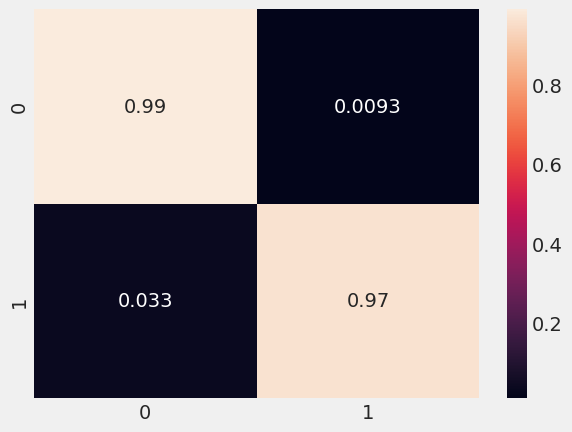

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)


#### 2. Precision


TP/(TP+FP)

In [39]:
89/(89+1)

0.9888888888888889

In [40]:
p = precision_score(y_test,y_pred)
p

0.9888888888888889



#### 3. Recall


TP/(TP+FN)

In [43]:
89/(89+3)

0.967391304347826

In [44]:
r = recall_score(y_test,y_pred)
r

0.967391304347826



#### 4. F1 Score


2 * precision * recall / (precision + recall)

In [45]:
2*p*r/(p+r)

0.978021978021978

In [46]:
f1_score(y_test,y_pred)

0.978021978021978



#### 5. ROC curve

In [47]:
roc_auc_score(y_test, y_pred)

0.9790660225442834

In [48]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0])

In [49]:
y_pred_proba = log_reg_1.predict_proba(X_test_scal)
y_pred_proba[:,1]

array([0.02868662, 0.01526755, 0.00782515, 0.99935078, 0.03737931,
       0.99998183, 0.99959904, 0.99986097, 0.00839612, 0.89281489,
       0.00884167, 0.18387485, 0.99970831, 0.00784529, 0.04205214,
       0.05165855, 0.99768684, 0.01174581, 0.99989932, 0.00655034,
       0.03202018, 0.04181113, 0.00892694, 0.0643254 , 0.99606617,
       0.02225225, 0.99969909, 0.08902957, 0.01192095, 0.02029811,
       0.00997779, 0.99991926, 0.01165836, 0.99947823, 0.73217208,
       0.00706622, 0.01300649, 0.03134472, 0.00870163, 0.00998886,
       0.01905521, 0.99675501, 0.99964198, 0.05641799, 0.99589067,
       0.10038035, 0.03221061, 0.99802155, 0.14508644, 0.99997952,
       0.00816422, 0.00777289, 0.89083278, 0.57130262, 0.20133097,
       0.99752621, 0.00922137, 0.99829534, 0.99967525, 0.99973713,
       0.00966106, 0.42855247, 0.99670109, 0.99992554, 0.99988844,
       0.99915764, 0.01084632, 0.99990938, 0.01109494, 0.99984574,
       0.76077602, 0.02589251, 0.99878569, 0.20760222, 0.03999

In [50]:
from sklearn.metrics import roc_curve

pfr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [51]:
pfr

array([0.        , 0.        , 0.        , 0.00925926, 0.00925926,
       0.07407407, 0.07407407, 0.08333333, 0.08333333, 0.18518519,
       0.18518519, 1.        ])

In [52]:
tpr

array([0.        , 0.01086957, 0.92391304, 0.92391304, 0.9673913 ,
       0.9673913 , 0.97826087, 0.97826087, 0.98913043, 0.98913043,
       1.        , 1.        ])

In [53]:
thresholds

array([1.99998183, 0.99998183, 0.81565203, 0.7879659 , 0.53351516,
       0.23504295, 0.20760222, 0.20133097, 0.18946342, 0.08902957,
       0.08403867, 0.00597066])

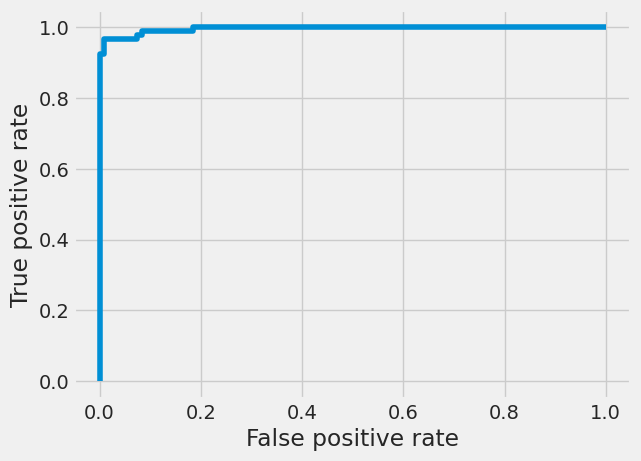

In [54]:
plt.plot(pfr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");



#### 6. P-R curve

In [55]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test,  y_pred_proba[:,1])

In [56]:
len(thresholds)

200

In [57]:
df_pr_curve = pd.DataFrame(precisions[:-1], columns=['precisions'])
df_pr_curve['recalls'] = recalls[:-1]
df_pr_curve['thresholds'] = thresholds
df_pr_curve

,precisions,recalls,thresholds
0,0.460000,1.000000,0.005971
1,0.462312,1.000000,0.006152
2,0.464646,1.000000,0.006550
3,0.467005,1.000000,0.006713
4,0.469388,1.000000,0.006850
...,...,...,...
195,1.000000,0.054348,0.999958
196,1.000000,0.043478,0.999960
197,1.000000,0.032609,0.999961
198,1.000000,0.021739,0.999980


In [58]:
df_pr_curve[10:30]

,precisions,recalls,thresholds
10,0.484211,1.0,0.007712
11,0.486772,1.0,0.007773
12,0.489362,1.0,0.007825
13,0.491979,1.0,0.007845
14,0.494624,1.0,0.008164
15,0.497297,1.0,0.008396
16,0.500000,1.0,0.008659
17,0.502732,1.0,0.008702
18,0.505495,1.0,0.008760
19,0.508287,1.0,0.008805


In [59]:
threshold = 0.8
#  Sea muy complicado que prediga un 1, porque tiene que tener una probabilidad de 1 mayor a 0.8
#  Por lo tanto, solo predecirá como 1 unos pocos, pero estaremos más seguros de ellos, es decir, unos FP muy bajos, y por lo tanto una precision alta

In [60]:
threshold = 0.2
#  Sea muy fácil que prediga un 1, porque tiene que tener una probabilidad de 1 mayor a 0.2
#  Por lo tanto, predecirá como 1 uno muchos de los registros, pero estaremos menos seguros de esos 1s, es decir, también estaremos más seguros de que todos los 1s los conseuimos predecir, y por tanto una recall alta.

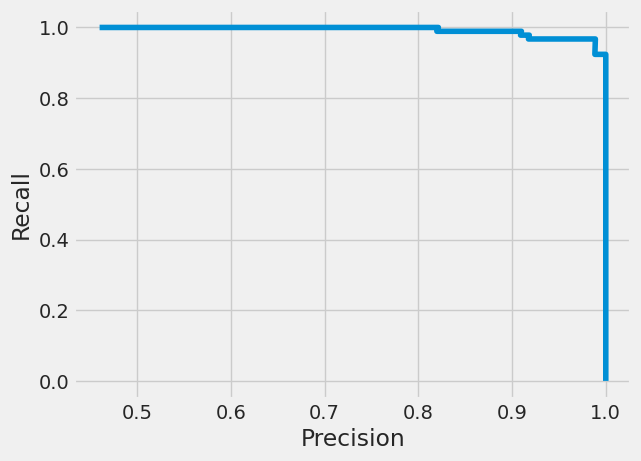

In [61]:
plt.plot(precisions,recalls)
plt.xlabel("Precision")
plt.ylabel("Recall");